## Healthcare Employee Attrition 
### EDA & Prediction Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from lib.utils.FuncUtils import FuncUtils

funcutils = FuncUtils()
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv("./resources/watson_healthcare_modified.csv")

Checking Data 

In [3]:
funcutils.check_df(df)

---------------- Info -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-nul

## EDA, Feature Selection & Preprocessing


In [4]:
# Drop identifying data
df = df.drop('EmployeeID', axis=1)

# Drop static value
df.drop("Over18", axis = 1, inplace = True)

df.dropna()

# Dropping Duplicate rows
df1=df.duplicated()
df[~df1]


In [5]:
# Selecting features
numerical_columns = [col for col in df.columns if df[col].dtypes in ("int64", "float64")]
categorical_columns = [col for col in df.columns if df[col].dtypes in ("object", "category")]

In [6]:
round(df.describe(), 2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1676.00,1676.00,1676.00,1676.00,1676.0,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.0,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00
mean,36.87,800.56,9.22,2.91,1.0,2.71,65.47,2.72,2.07,2.74,6516.51,14287.02,2.66,15.20,3.15,2.72,80.0,0.81,11.34,2.81,2.77,7.03,4.26,2.20,4.14
std,9.13,401.59,8.16,1.03,0.0,1.10,20.21,0.71,1.11,1.10,4728.46,7138.86,2.48,3.65,0.36,1.08,0.0,0.86,7.83,1.29,0.70,6.10,3.63,3.23,3.56
min,18.00,102.00,1.00,1.00,1.0,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,2.00,48.00,2.00,1.00,2.00,2928.25,7993.00,1.00,12.00,3.00,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,796.50,7.00,3.00,1.0,3.00,65.50,3.00,2.00,3.00,4899.00,14269.50,2.00,14.00,3.00,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,4.00,83.00,3.00,3.00,4.00,8380.25,20462.00,4.00,18.00,3.00,4.00,80.0,1.00,15.00,3.00,3.00,10.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


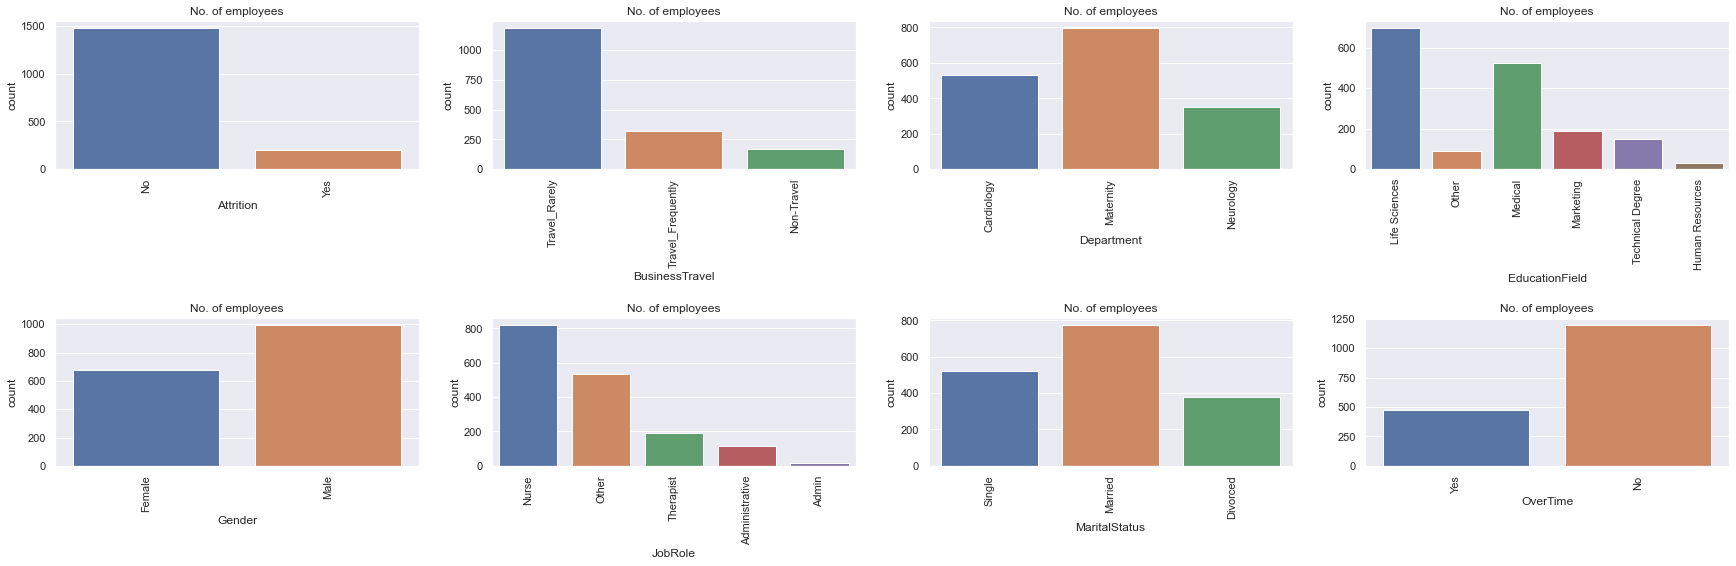

In [7]:
fig=plt.subplots(figsize=(30,30))
sns.set_theme(style="darkgrid")
for i, j in enumerate(categorical_columns):
    plt.subplot(6, 4, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employees")

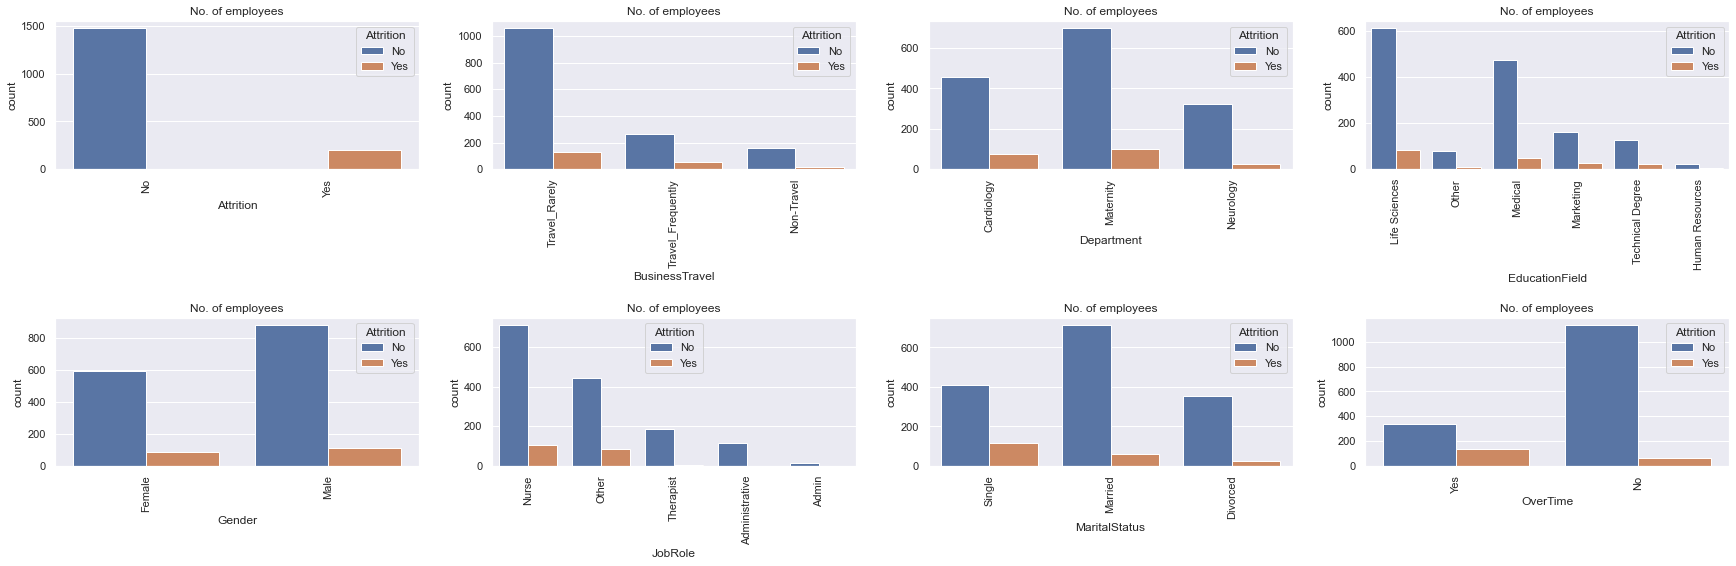

In [8]:
# Exploring Categorical Features with Attrition
fig=plt.subplots(figsize=(30,30))
sns.set_theme(style="darkgrid")
for i, j in enumerate(categorical_columns):
    plt.subplot(6, 4, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='Attrition')
    plt.xticks(rotation=90)
    plt.title("No. of employees")

In [9]:
from lib.utils.MLUtils import MLUtils
mlutils= MLUtils()
X = df.drop("Attrition", axis = 1)
y = df.Attrition == "Yes"
gvsearch = mlutils.main(X, y)


ValueError: could not convert string to float: 'Travel_Rarely'

In [ ]:
type(gvsearch)

NoneType